In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
def initialize_parameters(layer_dims):
    parameters = {}
    L = len(layer_dims)
  
    for i in range(1, L):
        parameters['W' + str(i)] = np.random.randn(layer_dims[i], layer_dims[i-1])*0.01
        parameters['b' + str(i)] = np.zeros((1, layer_dims[i])) + 0.01

    return parameters

In [46]:
def sigmoid(X):
    return 1/(1 + np.exp(-1*X))

In [47]:
def forward_step(A_prev, W, b):
    return sigmoid(np.dot(A_prev, W.T) + b)

In [48]:
def computation_n(X, y, parameters, eta, num_iters):
    hidden_output = []
    hidden_error = []
    m = X.shape[0]
    L = (len(parameters)//2) + 1      # number of layers
    
    # iterating for given number of iterations
    for itr in range(num_iters):
        # for each training example
        for i in range(m):
            # forward propagation for n layers
            hidden_output.append(X[i])
            A_prev = X[i]
            for l in range(1, L):
                A_prev = forward_step(A_prev, parameters['W' + str(l)], parameters['b' + str(l)])
                hidden_output.append(A_prev)
            
            # propagating the error backwards
            dOutput = hidden_output[-1]*(1 - hidden_output[-1])*(y[i] - hidden_output[-1])
            hidden_error.append(dOutput)
            k = 0
            for l in reversed(range(1, L-1)):
                error = hidden_output[l]*(1 - hidden_output[l])*np.dot(hidden_error[k], parameters['W' + str(l+1)])
                hidden_error.append(error)
                k += 1
            
            # parameter changes
            k = 0
            for l in reversed(range(1, L)):
                parameters['W' + str(l)] += eta*hidden_error[k].reshape(-1, 1)*hidden_output[l-1]
                parameters['b' + str(l)] += eta*hidden_error[k]
                k += 1
            
            hidden_output.clear()
            hidden_error.clear()
    
    return parameters

In [49]:
def train(X, y, parameters, alpha, num_iters, batch=True):
    parameters = computation_n(X, y, parameters, alpha, num_iters)
    return parameters

In [50]:
def test(X, y_test, parameters):
    y_pred = []
    L = (len(parameters)//2) + 1
    counter = 0

    for i in range(X.shape[0]):
        A_prev = X[i]
        for l in range(1, L):
            A_prev = forward_step(A_prev, parameters['W' + str(l)], parameters['b' + str(l)])
        y_pred.append(A_prev)


    y_pred = np.asarray(y_pred)
    y_pred[y_pred < 0.5] = 0
    y_pred[y_pred >= 0.5] = 1

    accuracy = np.mean(np.asarray(y_pred) == y_test)
    print("Accuracy : {} %".format(accuracy*100))

Sample of images from the MNIST Dataset : 


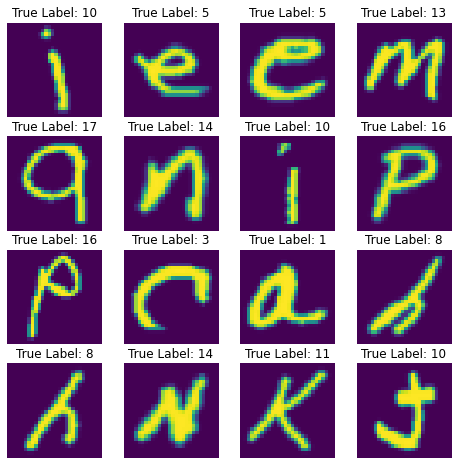

In [51]:
## LOADING TRAINING DATA 
data = pd.read_csv('/content/drive/MyDrive/emnist-letters-test.csv').to_numpy()
y = data[:, 0]
X = data[:, 1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

## PRINTING IMAGES FROM THE MNIST DATASET
print("Sample of images from the MNIST Dataset : ")
plt.figure(figsize=(8, 8))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.axis('off')
    r = np.random.randint(X_train.shape[0])   ## PICK A RANDON IMAGE TO SHOW
    plt.title('True Label: '+ str(y_train[r])) ## PRINT LABEL
    plt.imshow(X_train[r].reshape(28, 28).T)     ## PRINT IMAGE
plt.show()

In [52]:
## NORMALIZING THE PIXEL VALUES FOR TRAINING DATA
X_train = X_train / 255

## CONVERTING TARGET VALUE TO ONE-HOT ENCODED FORM
X_train = np.array(X_train)
b = np.zeros((y_train.size, 27))
b[np.arange(y_train.size), y_train] = 1
y_train = np.array(b)

print("y_train shape (after one-hot encoding) : {}".format(y_train.shape))

y_train shape (after one-hot encoding) : (9915, 27)


In [53]:
## NORMALIZING THE PIXEL VALUES FOR TESTING DATA
X_test = X_test / 255

## CONVERTING TARGET VALUE TO ONE-HOT ENCODED FORM
X_test = np.array(X_test)
b1 = np.zeros((y_test.size, 27))
b1[np.arange(y_test.size), y_test] = 1
y_test = np.array(b1)

print("y_test shape (after one-hot encoding) : {}".format(y_test.shape))

y_test shape (after one-hot encoding) : (4884, 27)


In [54]:
parameters = initialize_parameters([784, 50, 50, 27])
print("Length of parameters dictionary : {}".format(len(parameters)))

Length of parameters dictionary : 6


In [55]:
print("Training model...")
parameters = train(X_train, y_train, parameters, 0.01, 20)

Training model...


In [56]:
print("Testing model...")
test(X_test, y_test, parameters)

Testing model...
Accuracy : 96.29629629629629 %
